# 3. Merge hourly files


We have a bunch of matched files produced by `join_MODIS_with_ERA.py`

Lets check everything looks right and load them up as a single pandas dataframe:

In [1]:
import glob
import pandas as pd 
path = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/joined_ML_data_w_skt/'
files = sorted(glob.glob(path+'*.pkl'))

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_map(ds,x,y,q): #slow plotting function

    #Takes a ds, converts to pandas df
    
    if isinstance(ds, pd.DataFrame):
        df = ds
    else:
        df = ds.to_dataframe().reset_index()#.dropna()
        
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df[x], df[y]))
    
    #Plot the world
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax=world.boundary.plot(figsize=(24,12))
    
    gdf.plot(ax=ax,column=q,cmap='plasma',markersize=1,legend=True)
    
    
    plt.show()



/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/joined_ML_data_w_skt/aquaDay_2018-01-02_10H_70L_50T.pkl


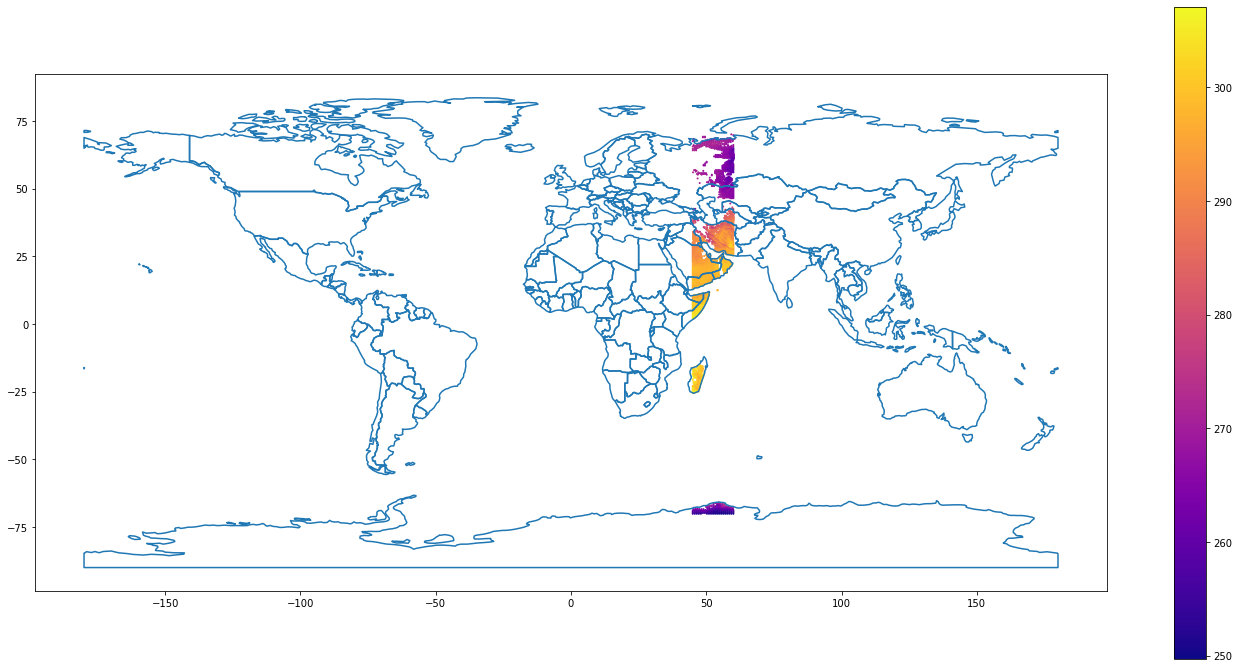

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/joined_ML_data_w_skt/aquaDay_2018-01-02_11H_70L_50T.pkl


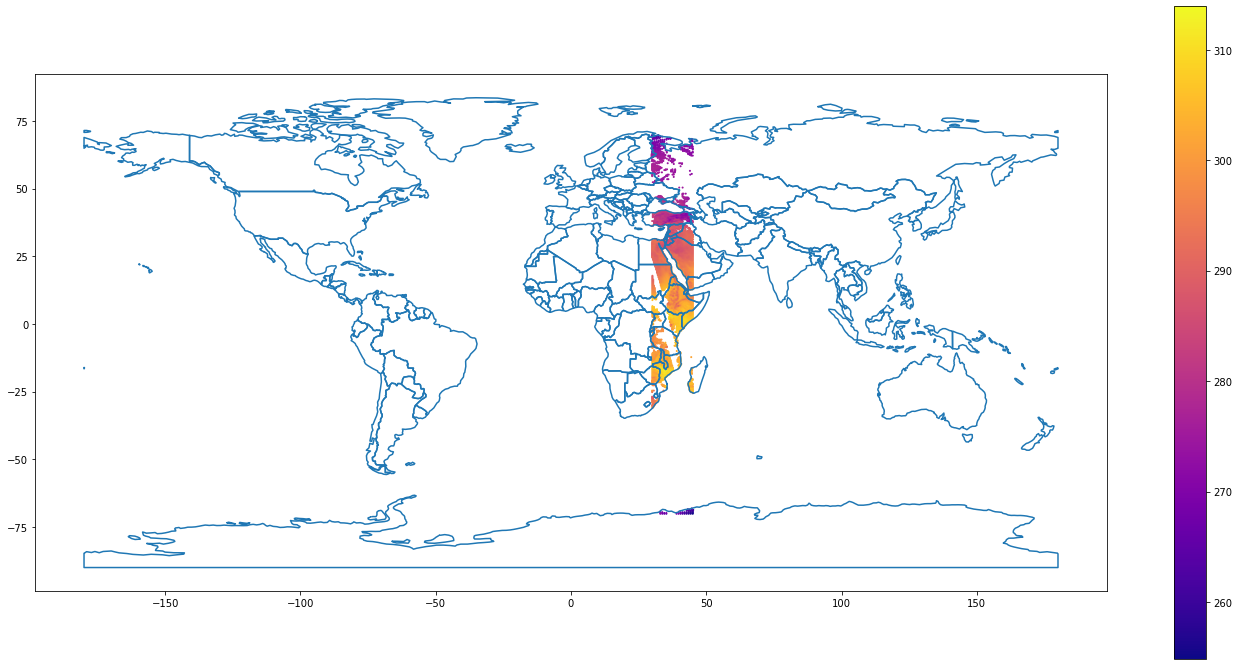

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/joined_ML_data_w_skt/aquaDay_2018-01-02_12H_70L_50T.pkl


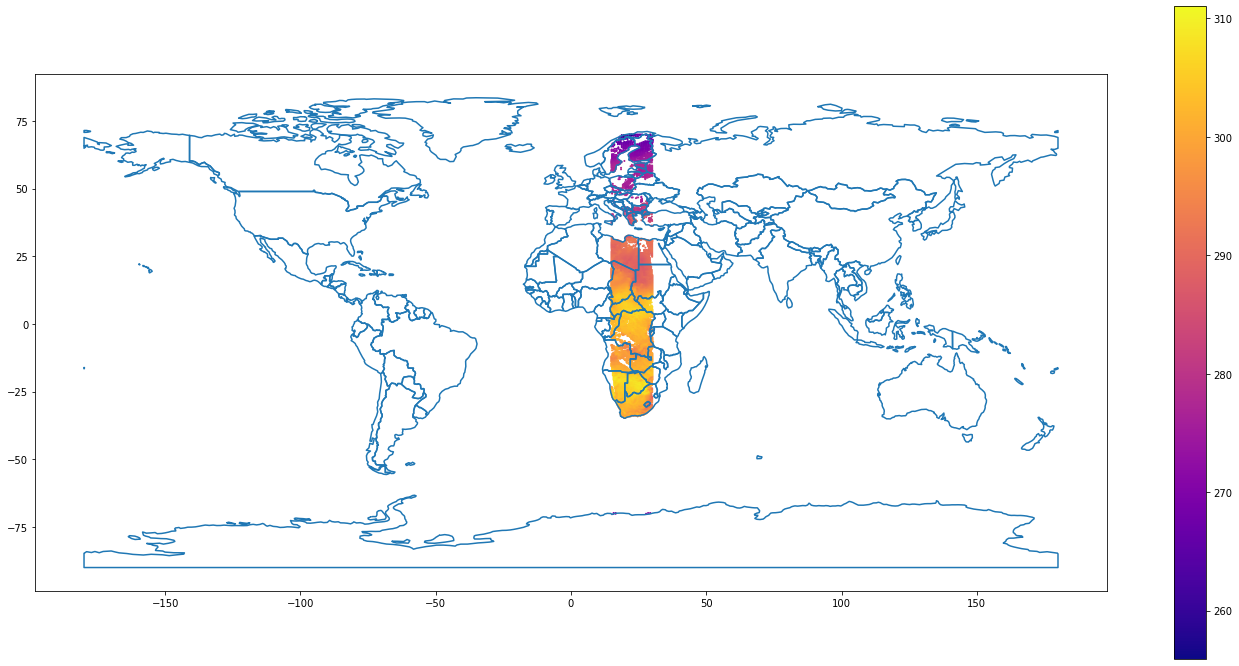

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/joined_ML_data_w_skt/aquaDay_2018-01-02_13H_70L_50T.pkl


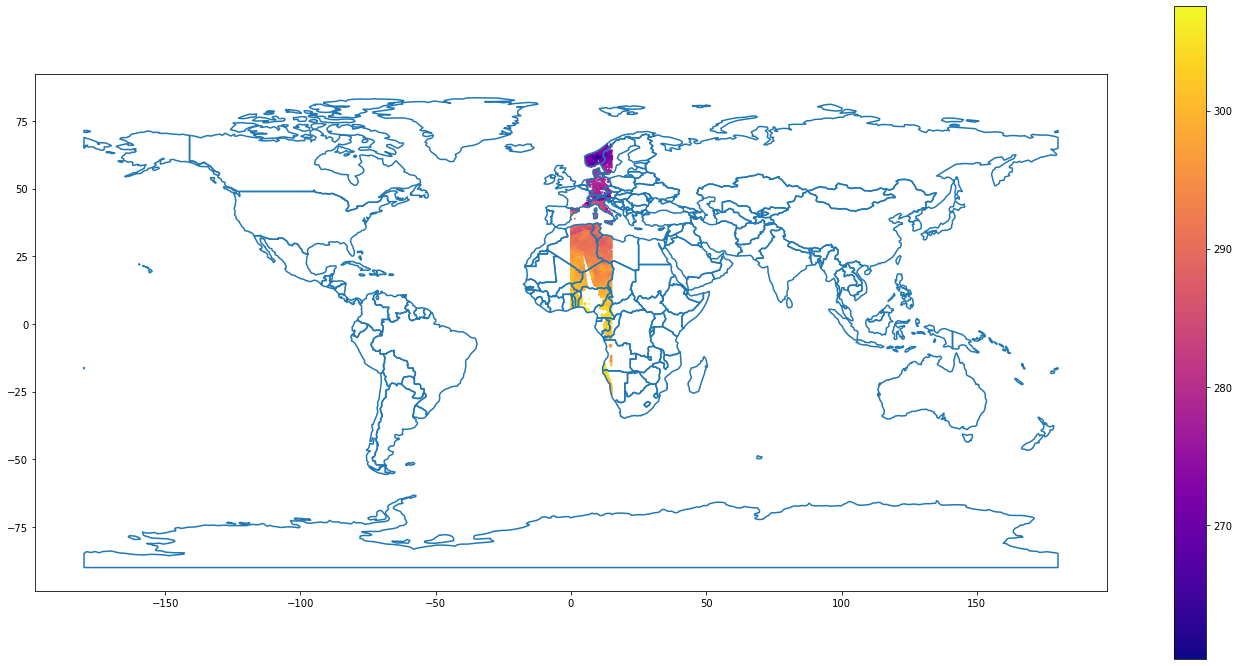

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/joined_ML_data_w_skt/aquaDay_2018-01-02_14H_70L_50T.pkl


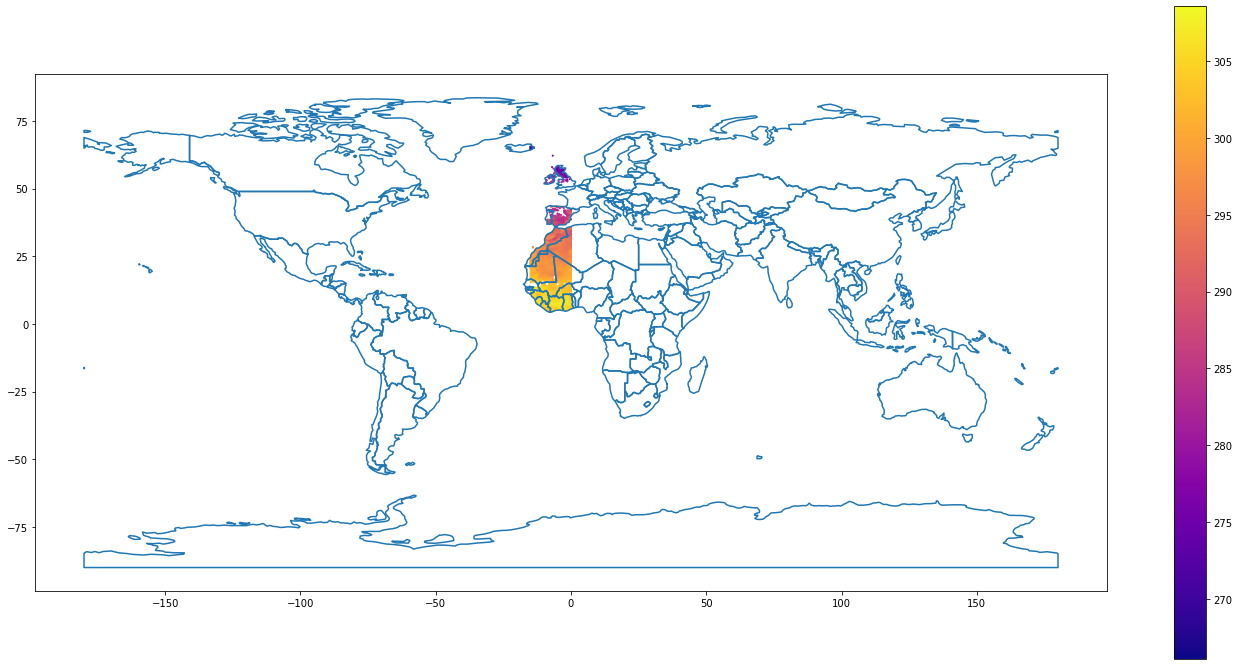

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/joined_ML_data_w_skt/aquaDay_2018-01-02_15H_70L_50T.pkl


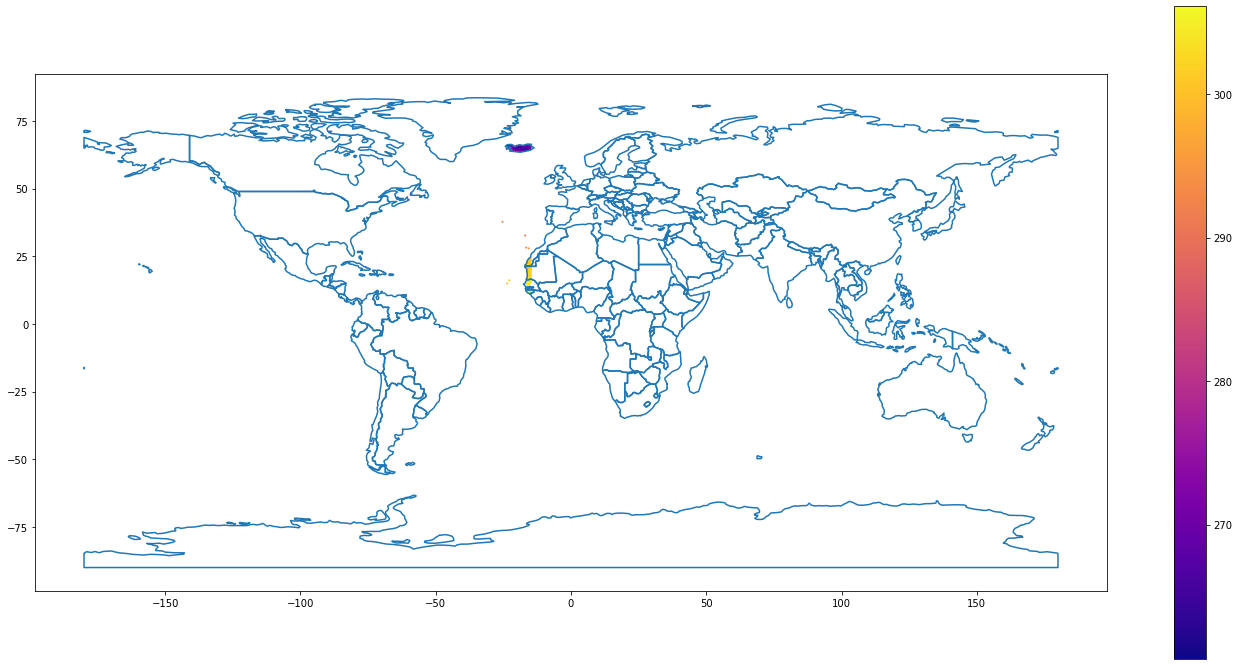

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/joined_ML_data_w_skt/aquaDay_2018-01-02_16H_70L_50T.pkl


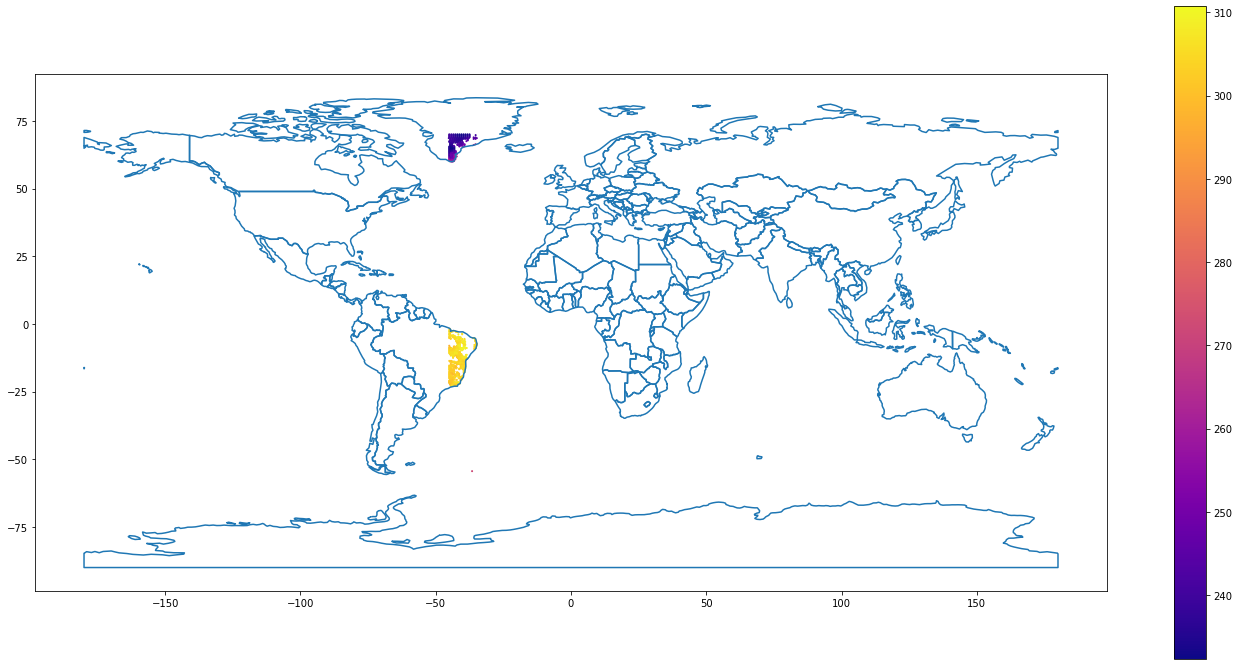

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/joined_ML_data_w_skt/aquaDay_2018-01-02_17H_70L_50T.pkl


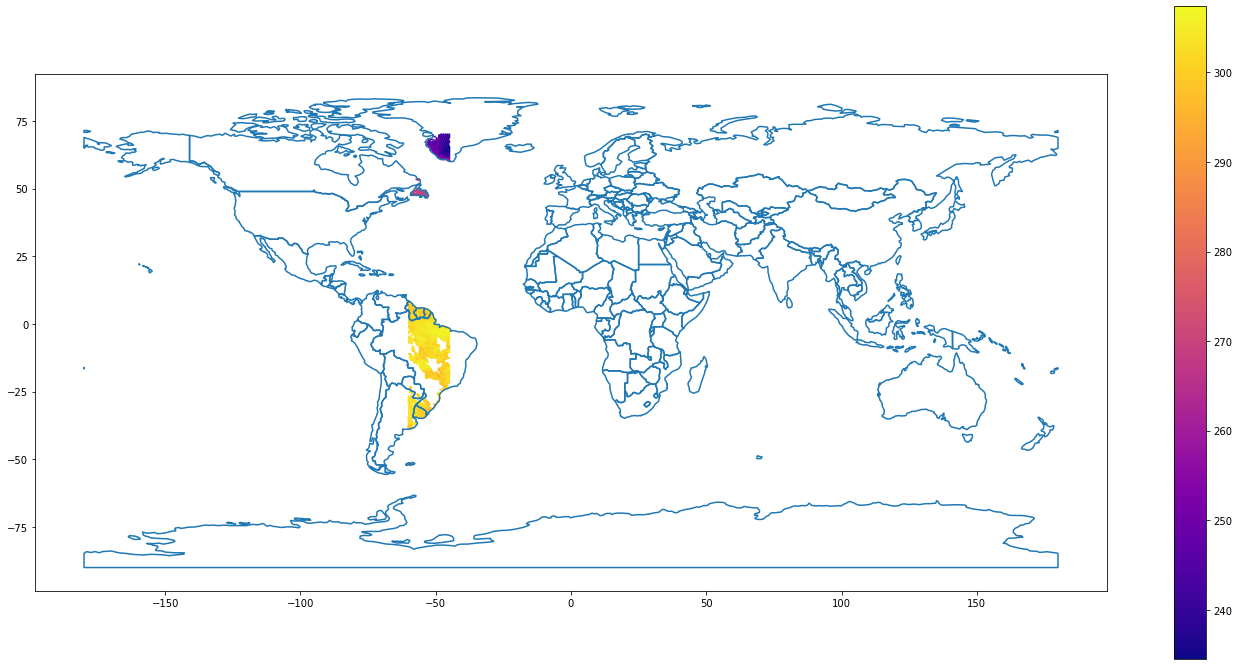

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/joined_ML_data_w_skt/aquaDay_2018-01-02_18H_70L_50T.pkl


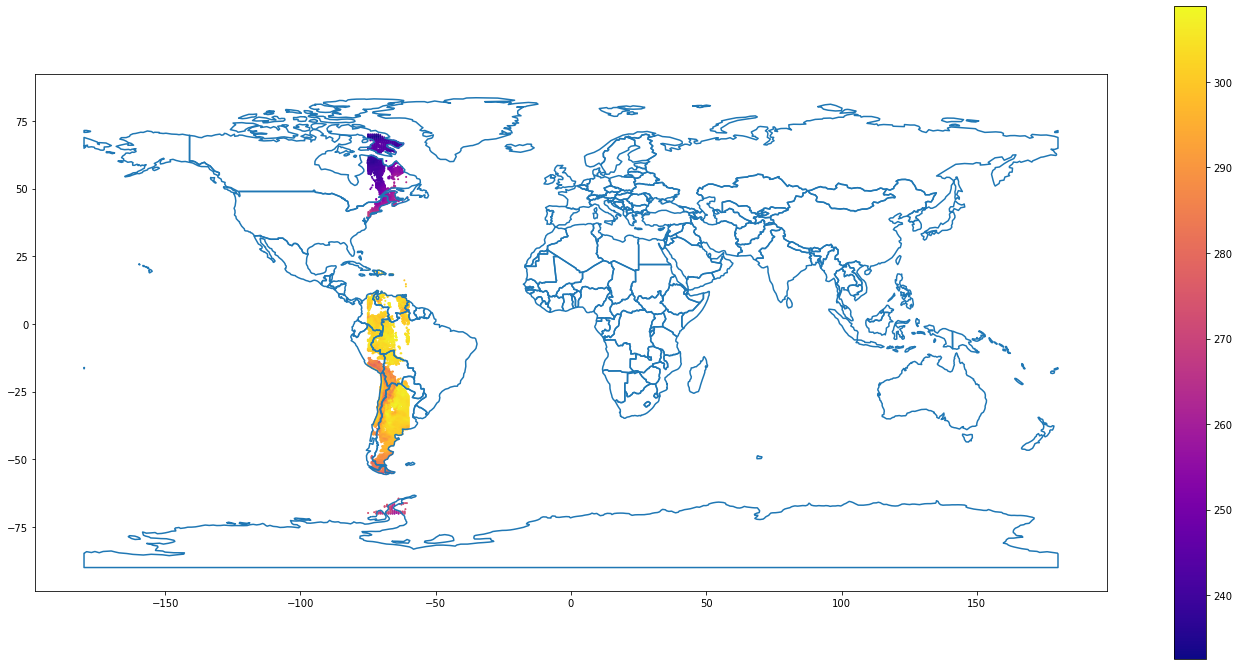

In [4]:
for i in range(1,10):
    f =files[i]
    print(f)
    df = pd.read_pickle(f)
    plot_map(df,'longitude_ERA', 'latitude_ERA', 't2m')

In [6]:
# Time is accidentally dropped during the merge in `Join_MODIS_with_ERA`
# Rather than correct that bug, we can read off time from the file name here
# May be a neater way to do this!

import numpy as np
def read_time(fname):
    
    row = f.split('aquaDay')[-1].split('_')
    d = row[1]
    t = int(row[2].split('H')[0])
    return np.datetime64(f'{d} {t:02}:00:00')

In [7]:
# Now load each file into a single df
#Could be a faster way to do this as well - can probably join .pkl directly

dfs = []
for f in files:
    df = pd.read_pickle(f)
    df['time'] = read_time(f)
    dfs.append(df)
    
df = pd.concat(dfs).reset_index()
#and save to disk
df.to_pickle('/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/ML_data_ERA_MODIS_joined.pkl')

In [8]:
ML_file = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/ML_data_ERA_MODIS_joined.pkl'

In [9]:
df = pd.read_pickle(ML_file)

# Check time variability

In [3]:
import pandas as pd
ML_file = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/ML_data_ERA_MODIS_joined.pkl'
df = pd.read_pickle(ML_file)

In [1]:
import pandas as pd

In [3]:
dates = pd.date_range('2018-01-01','2020-12-01', 
              freq='MS').strftime("%Y-%m").tolist()

dates = dates[0:1]

In [4]:
dates

['2018-01']

For a particular grid point, for a particular feature, how much does that feature vary over time?